In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

#import sklearn 

#from numpy import mean
#from numpy import std

#from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor

#from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal2.csv')
ordinal.shape

(2580, 84)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 81)

In [4]:
ordinal.head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,QA
0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,3.0,4.0,6.0,2.0,5.0,29.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,0.866028,4.0,9.0,4.0,856,126000,81.46,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0,5136
1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,3.0,2.0,6.0,3.0,1.0,73.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,0.500004,3.0,9.0,4.0,1049,139500,42.00,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0,5245
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,3.0,2.0,6.0,3.0,5.0,20.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,-0.499998,1.0,9.0,4.0,1001,124900,60.00,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0,5005


In [5]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [6]:
CB = CatBoostRegressor()

In [7]:

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
CB.fit(X_train, Y_train, verbose=False)
y_pred = CB.predict(X_test)

CB_Score = r2_score(Y_test, y_pred)
CB_Score
    

0.8764111965530639

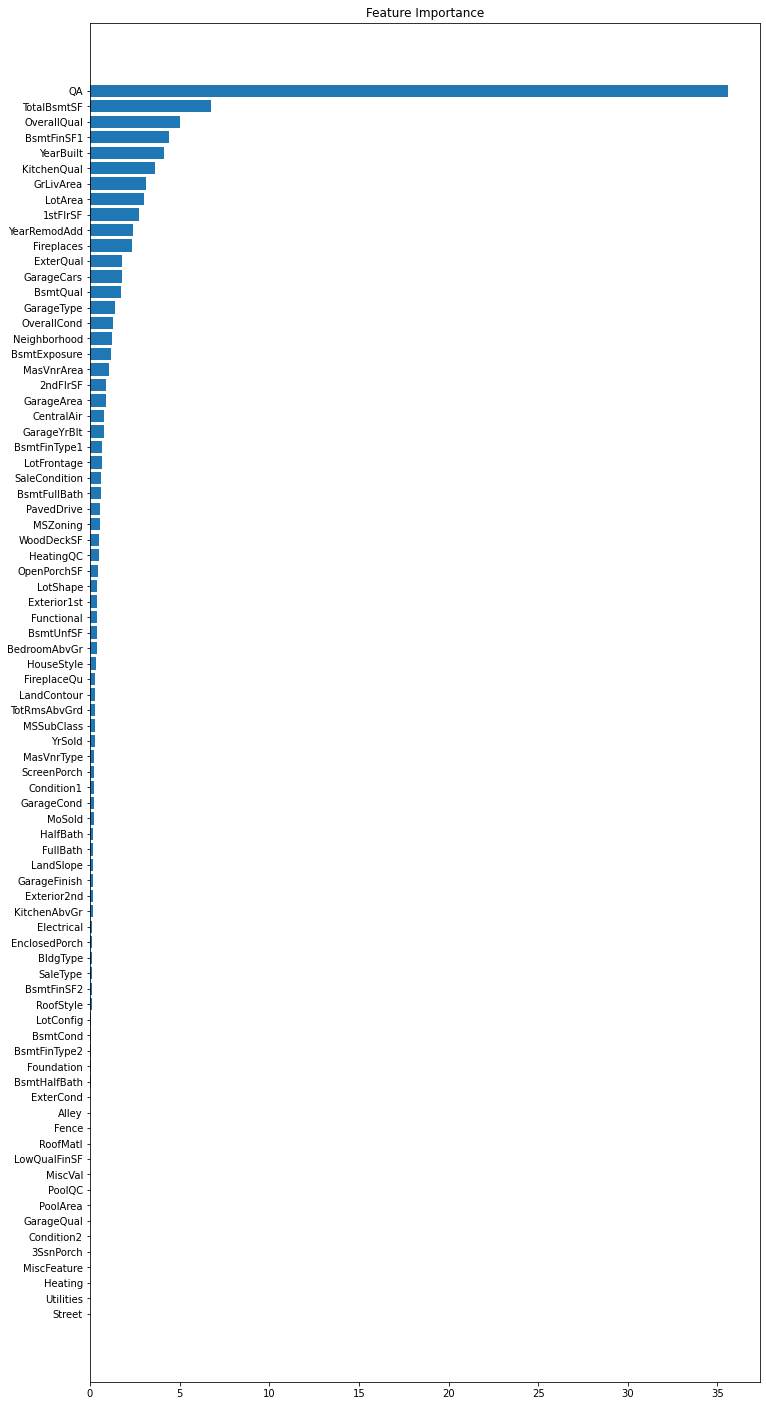

In [8]:
feature_importance = CB.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');


In [9]:
X_cols = ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, CB.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('QA', 35.5696997515067),
 ('TotalBsmtSF', 6.72470155140583),
 ('OverallQual', 5.003739108666983),
 ('BsmtFinSF1', 4.400778095948106),
 ('YearBuilt', 4.141481821733761),
 ('KitchenQual', 3.604937517827025),
 ('GrLivArea', 3.1020543972524077),
 ('LotArea', 3.011062654507665),
 ('1stFlrSF', 2.7588699535089725),
 ('YearRemodAdd', 2.399290388351481),
 ('Fireplaces', 2.3708830716268934),
 ('ExterQual', 1.795949402629517),
 ('GarageCars', 1.7959237150620995),
 ('BsmtQual', 1.7412724529976626),
 ('GarageType', 1.3704856147533644),
 ('OverallCond', 1.2737702583676054),
 ('Neighborhood', 1.2505690294699814),
 ('BsmtExposure', 1.1677135242993733),
 ('MasVnrArea', 1.0444079782134115),
 ('2ndFlrSF', 0.908705316709249),
 ('GarageArea', 0.8981363378819728),
 ('CentralAir', 0.7908463225509168),
 ('GarageYrBlt', 0.785311337589158),
 ('BsmtFinType1', 0.68157623448778),
 ('LotFrontage', 0.6602417651914342),
 ('SaleCondition', 0.6129382908628597),
 ('BsmtFullBath', 0.5884980531352403),
 ('PavedDrive', 0